In [1]:
import scipy.io as sio
import numpy as np
import os
from scipy import stats

potential = 'DW2D'#'DW2d'

savingFolder = 'Figures/toy2D/'

newpath = os.path.join(os.getcwd(),savingFolder)
if not os.path.exists(newpath):
        os.makedirs(newpath)

savingFolder += potential
     

# Define potential 

In [2]:
beta=1
dt=0.01


def ProjectionX(x):
    return x[0]


def ProjectionY(x):
    return x[1]


def nablaProjectionX(x):
    return np.array((1, 0))


def nablaProjectionY(x):
    return np.array((0, 1))


In [3]:
import cvlearn.model as md

h = 10.0
width= 2.0

mymodel = md.Model(potential, height=h, width=width)
V = mymodel.potential
dV = mymodel.d_potential
V_arr = mymodel.V_arr


In [4]:
import cvlearn.visualisations as vis

vis = vis.plot2D(V, mymodel.V_arr)

In [5]:
import cvlearn
import imp
imp.reload(cvlearn)

number_steps = 1000

params = {'stepsize': dt,
        'beta': beta,
        'potential': V,
        'd_potential': dV, 
         'gamma': 1.0
         }

itg = cvlearn.BAOAB(params)

x0 = np.array([0, 1])
itg.run(x0, number_steps)

x_sampled = itg.trajectory
x = x_sampled

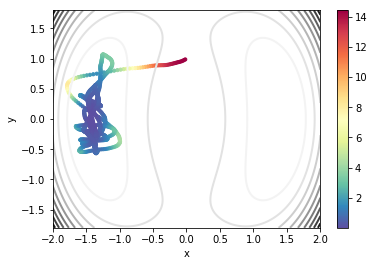

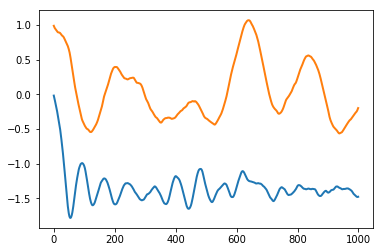

/home/ppxasjsm/miniconda3/envs/cvlearn/lib/python3.6/site-packages/cvlearn-0.1.0-py3.6.egg/cvlearn/visualisations.py:90: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  valsor, edgesor = np.histogram(xxx, bins=50, normed=True)


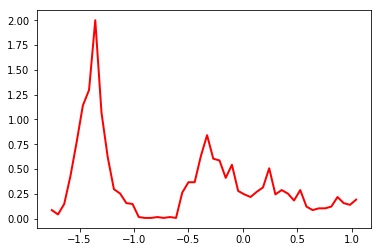

/home/ppxasjsm/miniconda3/envs/cvlearn/lib/python3.6/site-packages/cvlearn-0.1.0-py3.6.egg/cvlearn/visualisations.py:98: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  valsor, edgesor = np.histogram(xxx, bins=50, normed=True)


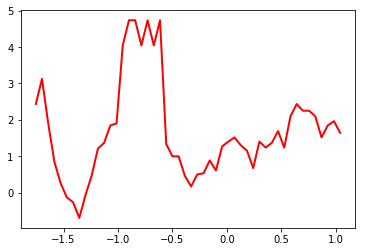

In [6]:
vis.plot(x)
vis.plot_time_series(x)
vis.plot_histogram(x)
vis.plot_free_energy(x, itg.beta)

In [7]:


params_tamd = {'stepsize': dt,
        'beta': beta,
        'potential': V,
        'd_potential': dV, 
         'gamma': 1.0,
          'CV':ProjectionX,
          'dCV':nablaProjectionX,
          'dt_tamd':dt,
          'T_tamd':5.0*(1/beta), 
          'kappa_tamd':4.0, 
          'mass_tamd':4.0, 
          'gamma_tamd':1.0
         }

tamd = cvlearn.TAMD(params_tamd)

x0 = np.array([0, 1])
tamd.run(x0, number_steps)

x_tamd = itg.trajectory


In [8]:
x = x[::100, :]

In [9]:
np.shape(x_tamd)

(1000, 2)

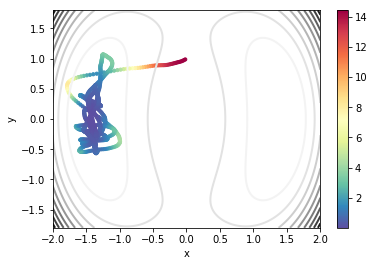

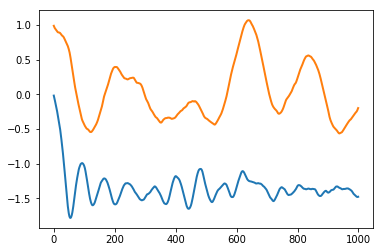

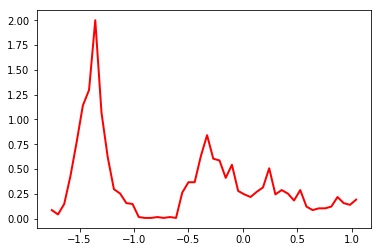

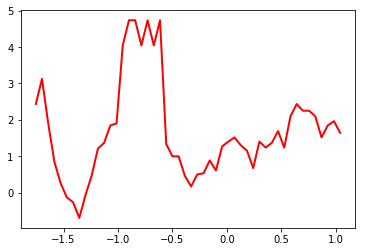

In [10]:
vis.plot(x_tamd)
vis.plot_time_series(x_tamd)
vis.plot_histogram(x_tamd)
vis.plot_free_energy(x_tamd, itg.beta)

In [11]:
from cvlearn.automatic_cv import *


In [12]:
# import imp
# import pydiffmap_extend.diffusion_map as dfm_est

# #import pydiffmap.diffusion_map as pdfm

# def get_dominant_ev(x, epsilon=None, tmdmap=True):
#     if epsilon is None:
#         epsilon = 'bgh'
#     nrneigh = 500

#     target = np.zeros(x.shape[0])
#     for n in range(x.shape[0]):
#         target[n] = np.exp(-beta*V(x[n,0], x[n, 1])).squeeze()

#     if tmdmap == True:
#         mydmap = dfm_est.DiffusionMap(n_evecs=5, epsilon=epsilon, alpha = 1.0, \
#                                 k=nrneigh, nearest_neighbors_algo='knearest')
#         mydmap.fit_transform(x, weights=target)
#     else:
#         mydmap = dfm_est.DiffusionMap(n_evecs=5, epsilon=epsilon, alpha = 0.5, \
#                                     k=nrneigh, nearest_neighbors_algo='knearest',
#                                     explicit_dentity=target)
#         mydmap.fit_transform(x)

    
#     return np.asarray(mydmap.evecs[:,0])


# def get_energy_levelset_indices(data, m=None, sc=None):
    
#     # compute energy of the points
#     energy = V_arr(data)
    
#     if m is None:
#         m = np.max(energy)
#     if sc is None:
#         sc_factor = 0.9
#     else:
#         sc_factor = sc

        
#     return np.where(energy > sc_factor * m)[0]

# def get_domain_indices(data, center=0.0, radius = 1.0):
    
#     indices = np.where((np.linalg.norm(data - center, axis=1) <= radius))[0]
                        
#     return np.array(indices)
    
# def choose_cv(xx, v):
    
#     cv1 = xx[:,0] #ProjectionX(xx)
#     cv2 = xx[:,1] #ProjectionY(xx)
    
#     cv1 = (cv1 - np.min(cv1))/(np.max(cv1)-np.min(cv1))
#     cv2 = (cv2 - np.min(cv2))/(np.max(cv2)-np.min(cv2))
    
#     print(v.shape)
#     print(cv1.shape)
    
#     cf_coeff_1 = stats.pearsonr(v, cv1)[0]
#     cf_coeff_2 = stats.pearsonr(v, cv2)[0]
    
#     print('Corr. coef x: '+repr(cf_coeff_1))
#     print('Corr. coef y: '+repr(cf_coeff_2))
    
#     if np.abs(cf_coeff_1) > np.abs(cf_coeff_2):
#         return 'x'
#     else:
#         return 'y'
    

(2,)
Initial condition [0 1]
Sampling std


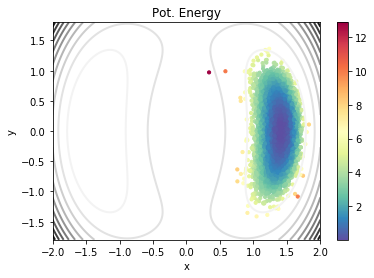

Computing diffusion maps
<bound method Model.DW2d of <cvlearn.model.Model object at 0x7f225f750ef0>>
Done


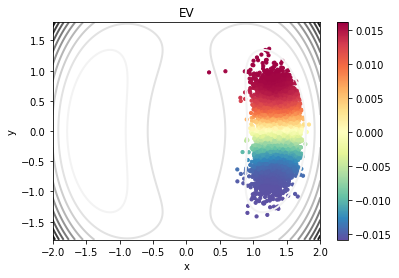

Choosing CV
(9998,)
(9998,)
Corr. coef x: -0.0010626997407036634
Corr. coef y: 0.973127221219954
New CV is y


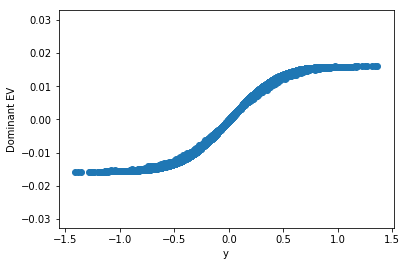

Sampling tamd


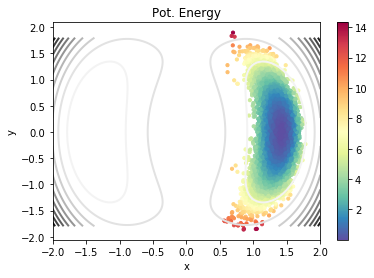

Computing diffusion maps
<bound method Model.DW2d of <cvlearn.model.Model object at 0x7f225f750ef0>>
Done


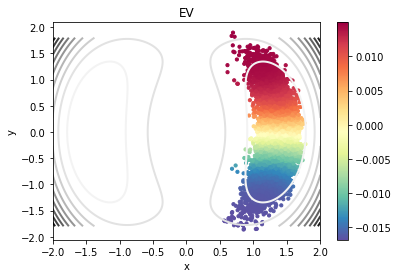

Choosing CV
(9998,)
(9998,)
Corr. coef x: 0.06725613866573348
Corr. coef y: 0.9777553045093615
New CV is y


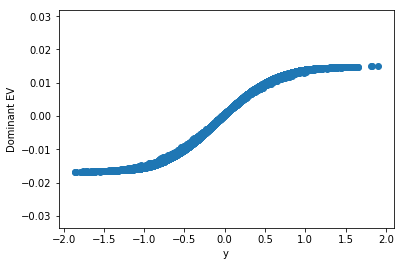

Sampling tamd


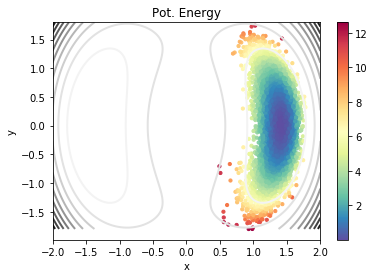

Computing diffusion maps
<bound method Model.DW2d of <cvlearn.model.Model object at 0x7f225f750ef0>>
Done


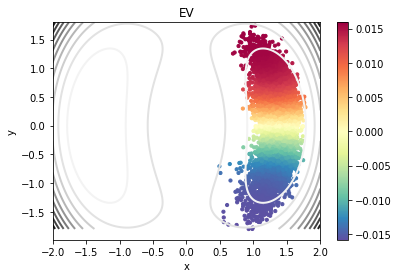

Choosing CV
(9996,)
(9996,)
Corr. coef x: 0.03377644854359047
Corr. coef y: 0.9768260140959819
New CV is y


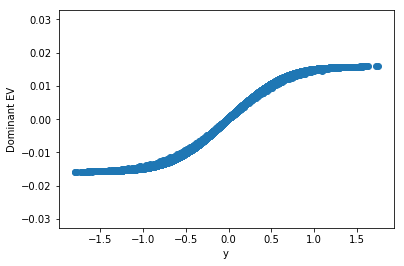

Sampling tamd


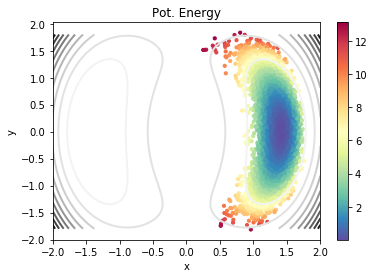

Computing diffusion maps
<bound method Model.DW2d of <cvlearn.model.Model object at 0x7f225f750ef0>>
Done


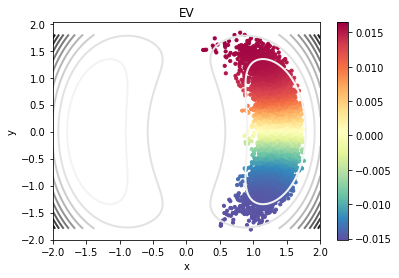

Choosing CV
(9994,)
(9994,)
Corr. coef x: -0.06163147864031917
Corr. coef y: 0.9775020684702864
New CV is y


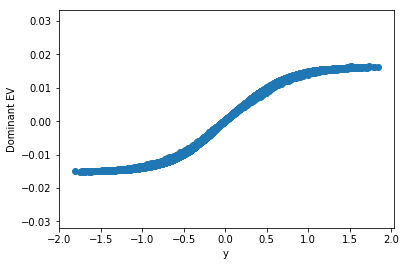

Sampling tamd


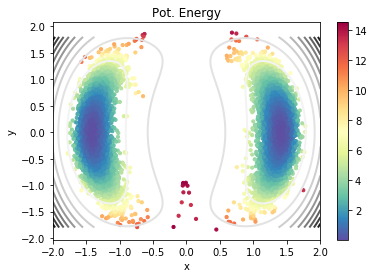

Computing diffusion maps
<bound method Model.DW2d of <cvlearn.model.Model object at 0x7f225f750ef0>>
Done


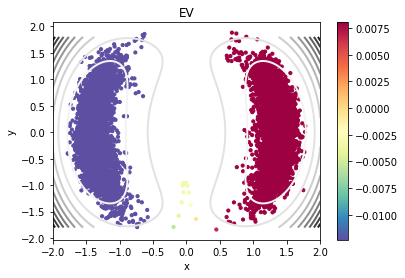

Choosing CV
(9996,)
(9996,)
Corr. coef x: 0.9929430161180354
Corr. coef y: 0.0319590583911287
New CV is x


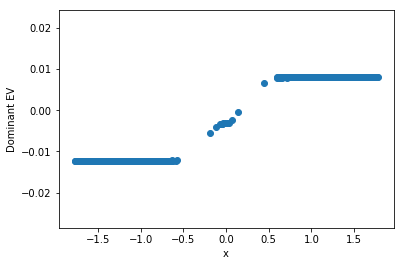

In [13]:
import matplotlib.pyplot as plt 

x0 =np.array([0, 1])
p0 = np.random.randn(2)
print(x0.shape)
print("Initial condition "+str(x0))
nrsteps = 100000

CV = ProjectionX
dCV = nablaProjectionX
number_iterations = 5


for it in range(number_iterations):
    
    # sample
    if it == 0:
        print('Sampling std')
        itg.run(x0, nrsteps)
        x = itg.trajectory
    else:
        print('Sampling tamd')
        tamd.theta_fct = CV
        tamd.diff_theta_fct = dCV
        tamd.run(x0, nrsteps)
        
        x = tamd.trajectory
        
    x0 = x[-1]
    
    indices_cut_energy = get_energy_levelset_indices(x, V_arr, sc=0.9)
    all_indices = np.arange(x.shape[0])
    cut_energy = np.setdiff1d(all_indices, indices_cut_energy)

    x = x[cut_energy, :]
    
    x_subs = np.asarray(np.copy(x[::10, :]))
    #print(np.shape(x_subs))
    
    vis.plot(x_subs, title='Pot. Energy', saveas='dw_'+repr(it))
    
    # compute dominant eigenfunction
    print('Computing diffusion maps')
    print(V)
    ev = get_dominant_ev(x_subs, V, beta, epsilon=0.1, tmdmap=True)
    
    print('Done')
    
    vis.plot(x_subs, color=ev, title='EV', saveas='ev_'+repr(it))
    
    print('Choosing CV')
    
    cv_id = choose_cv(x_subs, ev)
    
    print('New CV is '+ cv_id)
    
    if cv_id == 'x':
        CV = ProjectionX
        dCV = nablaProjectionX
    else:
        CV = ProjectionY
        dCV = nablaProjectionY
        
    y = []
    for i in range(len(x_subs)):
        y.append(CV(x_subs[i,:]))


    plt.scatter(y, ev)
    plt.xlabel(cv_id)
    plt.ylabel('Dominant EV')
    plt.savefig(savingFolder + 'cv_ev_'+repr(it) +'.pdf',  format='pdf', dpi=100, bbox_inches='tight')
    plt.show()
    



In [18]:
x_subs[0]

array([ 1.1008513 , -1.30000116])

# Accumulate points

(2,)
Initial condition [0 1]
Sampling std


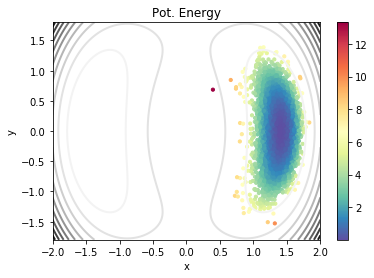

Computing diffusion maps
Done


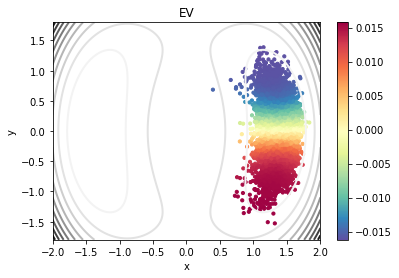

Choosing CV
(9993,)
(9993,)
Corr. coef x: 0.02221901882946649
Corr. coef y: -0.9709744719952392
New CV is y
Sampling tamd


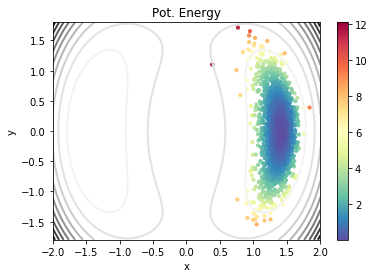

Computing diffusion maps
Done


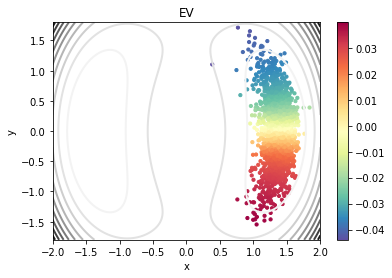

Choosing CV
(1997,)
(1997,)
Corr. coef x: 0.0477124036928906
Corr. coef y: -0.9725370456585416
New CV is y
Sampling tamd


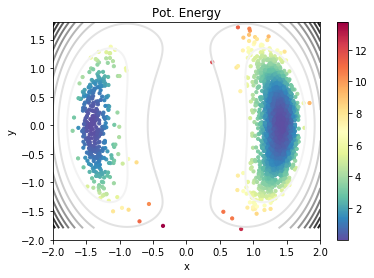

Computing diffusion maps
Done


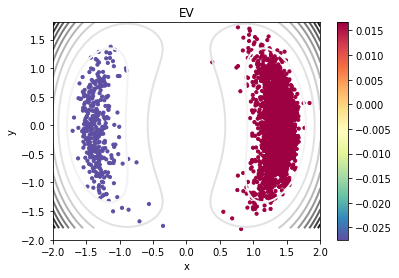

Choosing CV
(2994,)
(2994,)
Corr. coef x: 0.985754395892409
Corr. coef y: 0.01858075038370231
New CV is x
Sampling tamd


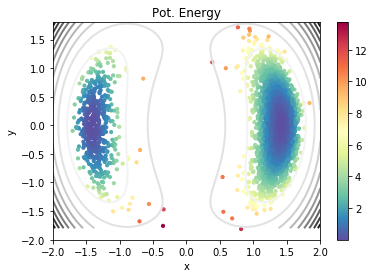

Computing diffusion maps
Done


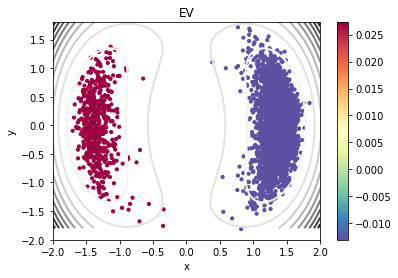

Choosing CV
(3994,)
(3994,)
Corr. coef x: -0.9864514373031605
Corr. coef y: -0.013987874190629253
New CV is x
Sampling tamd


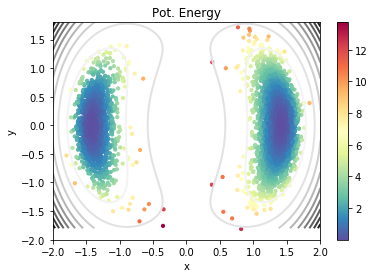

Computing diffusion maps
Done


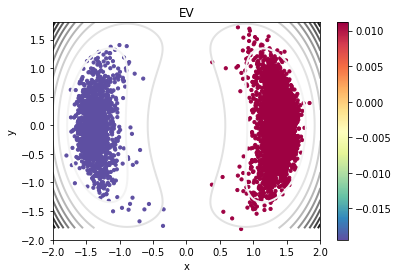

Choosing CV
(4994,)
(4994,)
Corr. coef x: 0.9922843430367684
Corr. coef y: 0.0032845515654594732
New CV is x
Sampling tamd


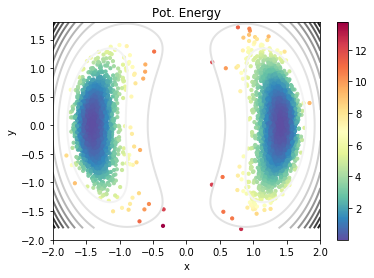

Computing diffusion maps
Done


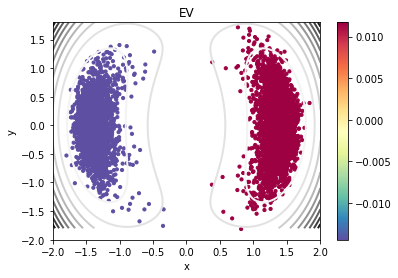

Choosing CV
(5994,)
(5994,)
Corr. coef x: 0.9932939170795355
Corr. coef y: -0.0024322947619251113
New CV is x
Sampling tamd


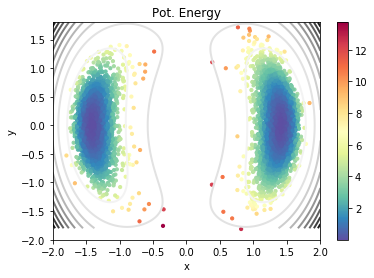

Computing diffusion maps
Done


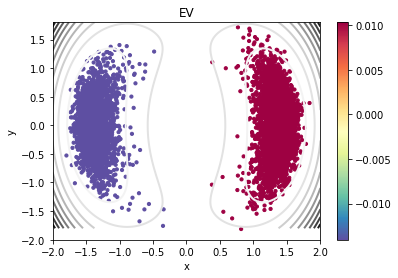

Choosing CV
(6994,)
(6994,)
Corr. coef x: 0.993271518203487
Corr. coef y: 0.0017721514703207342
New CV is x
Sampling tamd


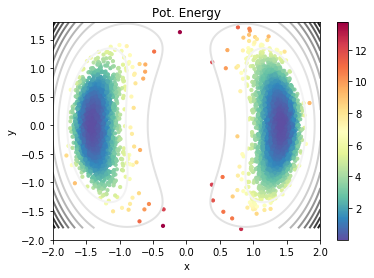

Computing diffusion maps
Done


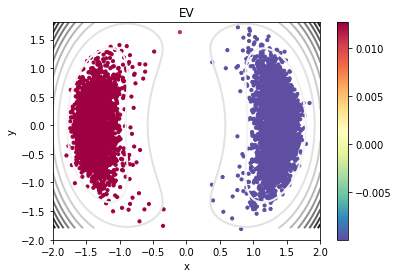

Choosing CV
(7994,)
(7994,)
Corr. coef x: -0.993327264626916
Corr. coef y: -0.0030618099288301395
New CV is x


In [15]:
x0 =np.array([0, 1])
p0 = np.random.randn(2)
print(x0.shape)
print("Initial condition "+str(x0))
nrsteps = 100000

CV = ProjectionX
dCV = nablaProjectionX
number_iterations = 8

changed_cv = 1
cv_old = 'x'
cv_new = 'y'

saved_x = []

for it in range(number_iterations):
    
    # sample
    if it == 0:
        print('Sampling std')
        itg.run(x0, nrsteps)
        x_new = itg.trajectory
    else:
        print('Sampling tamd')
        tamd.theta_fct = CV
        tamd.diff_theta_fct = dCV
        tamd.run(x0, nrsteps)
        
        x_new = tamd.trajectory
    
    if cv_old is not cv_new:
        changed_cv = 1
    else:
        changed_cv = 0
        
    if it == 0:
        x = np.copy(x_new)
    else:
        
        x = np.concatenate((x, x_new))
        
    if cv_id == 'x':
        saved_x.append(x)
        
    x0 = x[-1]
    
    x_subs = np.asarray(np.copy(x))
    
    while len(x_subs) > 10000:
        x_subs = x_subs[::10]
    
    indices_cut_energy = get_energy_levelset_indices(x_subs, V_arr, sc=0.9)
    all_indices = np.arange(x_subs.shape[0])
    cut_energy = np.setdiff1d(all_indices, indices_cut_energy)

    x_subs = x_subs[cut_energy, :]
    
    #print(np.shape(x_subs))
    
    vis.plot(x_subs, title='Pot. Energy')
    
    # compute dominant eigenfunction
    print('Computing diffusion maps')
    ev = get_dominant_ev(x_subs, V, beta, epsilon=0.1, tmdmap=True)
    
    print('Done')
    
    vis.plot(x_subs, color=ev, title='EV')
    
    print('Choosing CV')
    
    cv_old = np.copy(cv_id)
    cv_id = choose_cv(x_subs, ev)
    
    cv_new = np.copy(cv_id)
    
    print('New CV is '+ cv_id)
    
    if cv_id == 'x':
        CV = ProjectionX
        dCV = nablaProjectionX
    else:
        CV = ProjectionY
        dCV = nablaProjectionY
    

